In [18]:
import pandas as pd
import plotly.express as ex
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("EY/credit_risk_dataset.csv", skipinitialspace = True)
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [9]:
df.describe([0.05, 0.10, 0.25, 0.50, 0.75, 0.80, 0.90, 0.95, 0.99]).T


,count,mean,std,min,5%,10%,25%,50%,75%,80%,90%,95%,99%,max
person_age,32581.0,27.734600,6.348078,20.00,22.00,22.00,23.00,26.00,30.00,32.00,36.000,40.00,50.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,22880.00,28590.00,38500.00,55000.00,79200.00,86000.00,110004.000,138000.00,225200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,0.00,0.00,2.00,4.00,7.00,8.00,10.000,13.00,18.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,2000.00,3000.00,5000.00,8000.00,12200.00,14500.00,19000.000,24000.00,29800.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,6.03,6.91,7.90,10.99,13.47,13.92,15.298,16.32,18.62,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.000,1.00,1.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.04,0.05,0.09,0.15,0.23,0.25,0.320,0.38,0.50,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,2.00,2.00,3.00,4.00,8.00,9.00,11.000,14.00,17.00,30.00


In [65]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [66]:
# drop values that are null
df.dropna(axis=0,inplace=True)

In [67]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [73]:
(df['person_age'].value_counts().values>90).sum()

25

In [72]:
max_ = df['person_age'].max()
min_ = df['person_age'].min()
print(f"maximum {max_}")
print(f"minimum {min_}")

maximum 144
minimum 20


In [74]:
#drop people that are over 80 because the number of people over 80 is insignificant
df = df.drop(df[df['person_age'] > 80].index, axis=0)

In [76]:
# people with an age between x and y
def age_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = df['person_age'].between(next,arr[i+1]).sum()
        print(f'There are {num_people} people with an age between {next} and {arr[i+1]}.')
        
age_group([0 ,18, 26, 36, 46, 56, 66])

print(df.shape[0]) 

There are 0 people with an age between 1 and 18.
There are 15682 people with an age between 19 and 26.
There are 10422 people with an age between 27 and 36.
There are 2054 people with an age between 37 and 46.
There are 372 people with an age between 47 and 56.
There are 87 people with an age between 57 and 66.
28633


In [78]:
max_ = df['person_income'].max()
min_ = df['person_income'].min()

print(f"maximum {max_}")
print(f"minimum {min_}")

maximum 2039784
minimum 4000


In [79]:
# people with an income between x and y
def income_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = df['person_income'].between(next,arr[i+1]).sum()
        print(f'There are {num_people} people with an income between {next} and {arr[i+1]}.')
        
income_group([0, 25000, 50000, 75000, 100000,float('inf')])

print(df.shape[0])

There are 1972 people with an income between 1 and 25000.
There are 10198 people with an income between 25001 and 50000.
There are 8532 people with an income between 50001 and 75000.
There are 4197 people with an income between 75001 and 100000.
There are 3734 people with an income between 100001 and inf.
28633


In [80]:
max_loan_amount = df['loan_amnt'].max()
min_loan_amount = df['loan_amnt'].min()

print(f"maximum {max_loan_amount}")
print(f"minimum {min_loan_amount}")

maximum 35000
minimum 500


In [81]:

# people with an income between x and y
def loan_amount_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = df['loan_amnt'].between(next,arr[i+1]).sum()
        print(f'There are {num_people} people with an loan_amount between {next} and {arr[i+1]}.')
        
loan_amount_group([0, 5000, 10000, 15000, float('inf')])

print(df.shape[0])   

There are 8182 people with an loan_amount between 1 and 5000.
There are 10608 people with an loan_amount between 5001 and 10000.
There are 5430 people with an loan_amount between 10001 and 15000.
There are 4413 people with an loan_amount between 15001 and inf.
28633


In [85]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


In [86]:
df['person_home_ownership'].value_counts()

RENT        14548
MORTGAGE    11797
OWN          2192
OTHER          94
Name: person_home_ownership, dtype: int64

In [11]:
df["loan_status"].describe()


count    32581.000000
mean         0.218164
std          0.413006
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: loan_status, dtype: float64

Text(0, 0.5, 'Loan Percent Income')

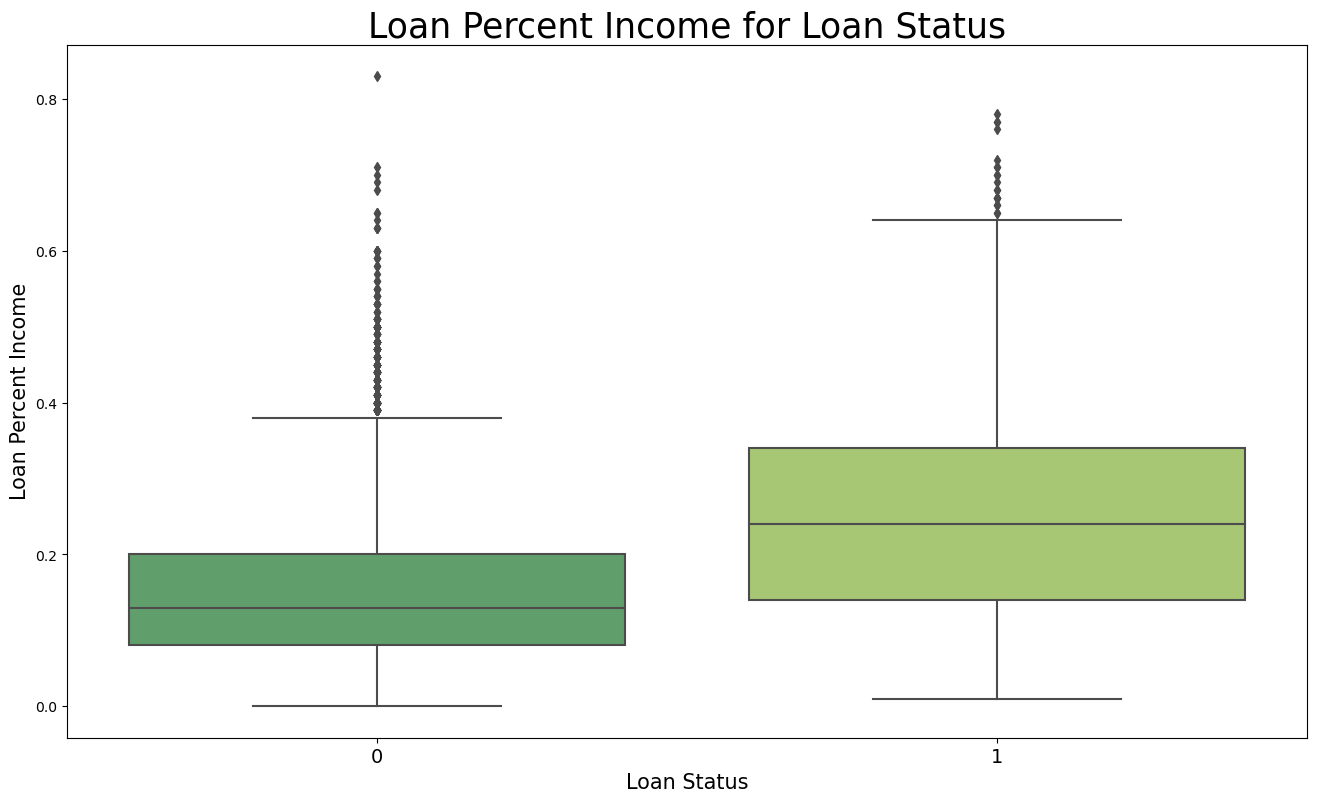

In [23]:
#relation entre loan_status et loan_percent_income
x = df[["loan_status", "loan_percent_income"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "loan_status", y = "loan_percent_income", data = x, palette = 'summer');

plt.title('Loan Percent Income for Loan Status', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Loan Status", fontsize = 15)
plt.ylabel("Loan Percent Income", fontsize = 15)


In [25]:
df.describe(include = "O").T


,count,unique,top,freq
person_home_ownership,32581,4,RENT,16446
loan_intent,32581,6,EDUCATION,6453
loan_grade,32581,7,A,10777
cb_person_default_on_file,32581,2,N,26836


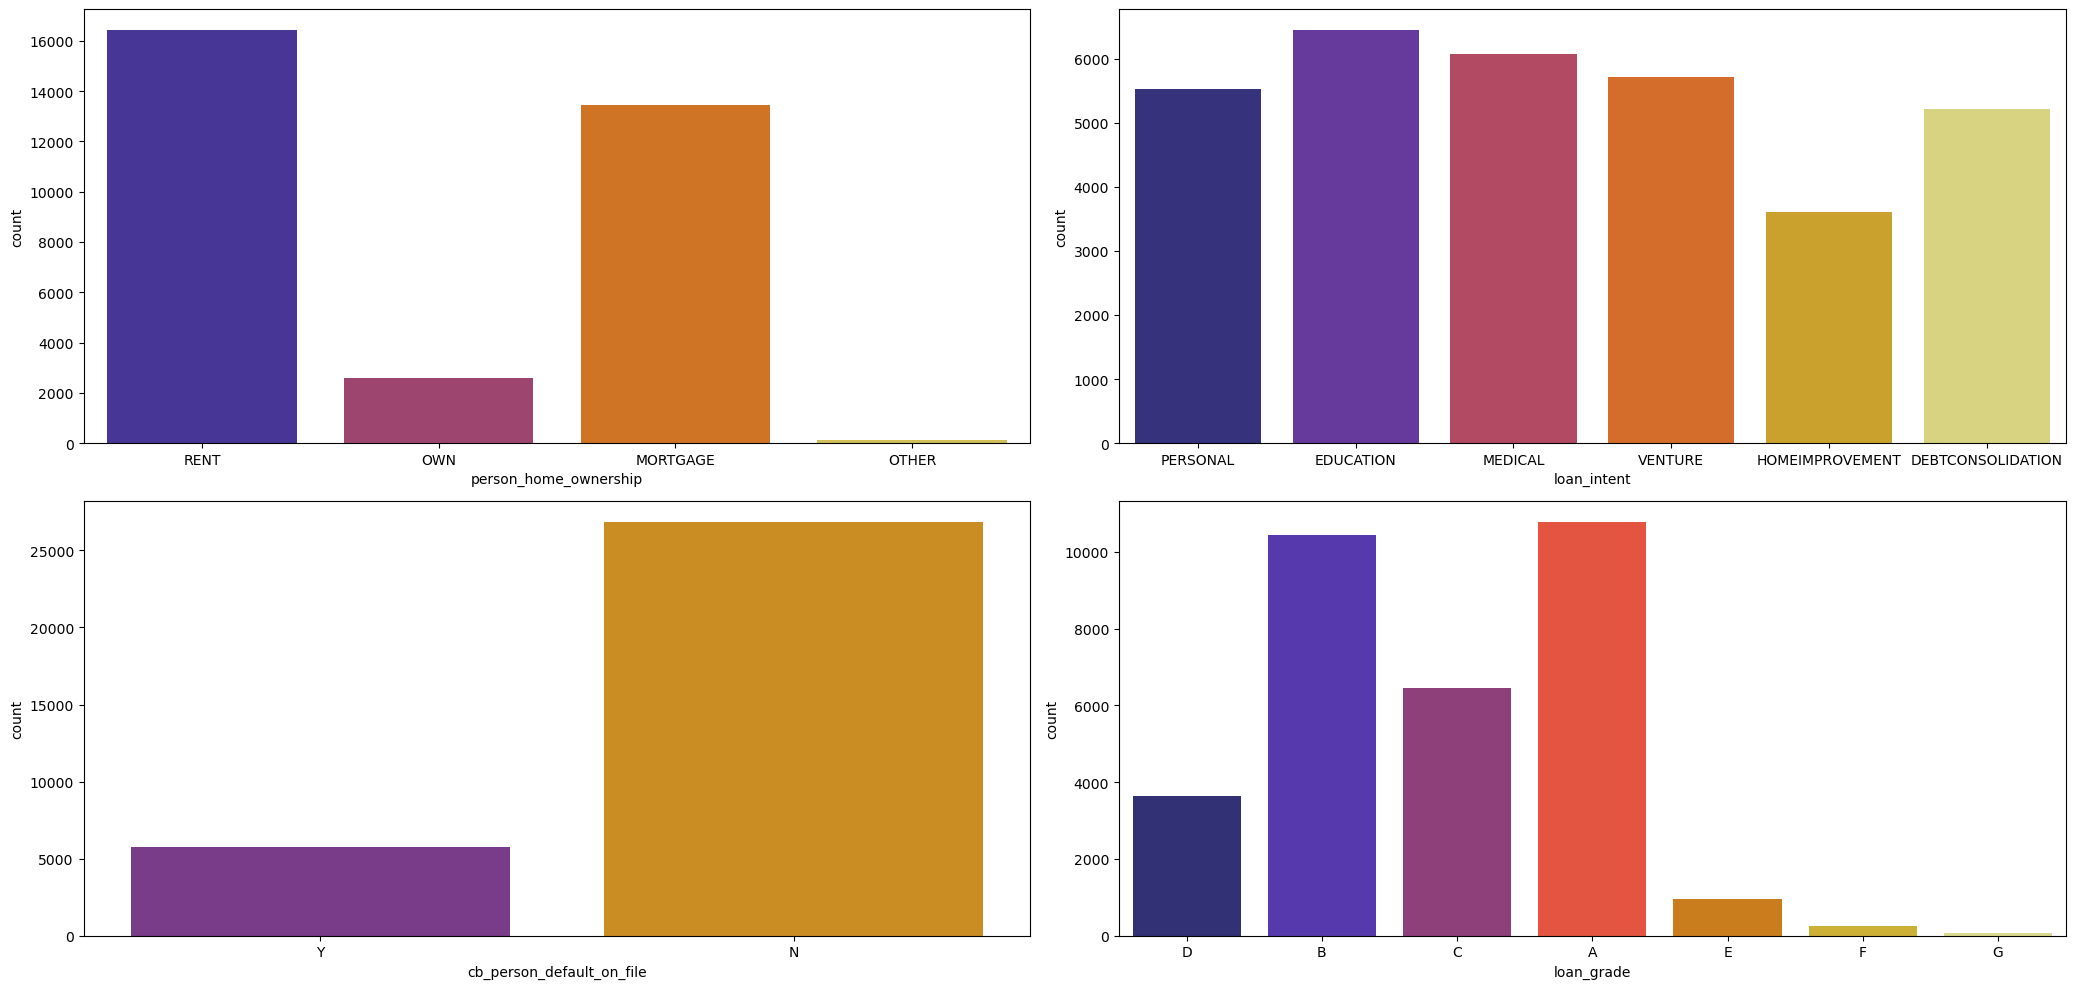

In [32]:
fig, axes = plt.subplots(2, 2, figsize=(21, 10))

sns.countplot(x='person_home_ownership', data=df, ax=axes[0, 0], palette='CMRmap')
sns.countplot(x='loan_intent', data=df, ax=axes[0, 1], palette='CMRmap')
sns.countplot(x='loan_grade', data=df, ax=axes[1, 1], palette='CMRmap')
sns.countplot(x='cb_person_default_on_file', data=df, ax=axes[1, 0], palette='CMRmap')

plt.tight_layout()  # Pour améliorer l'espacement entre les sous-graphiques

plt.show()


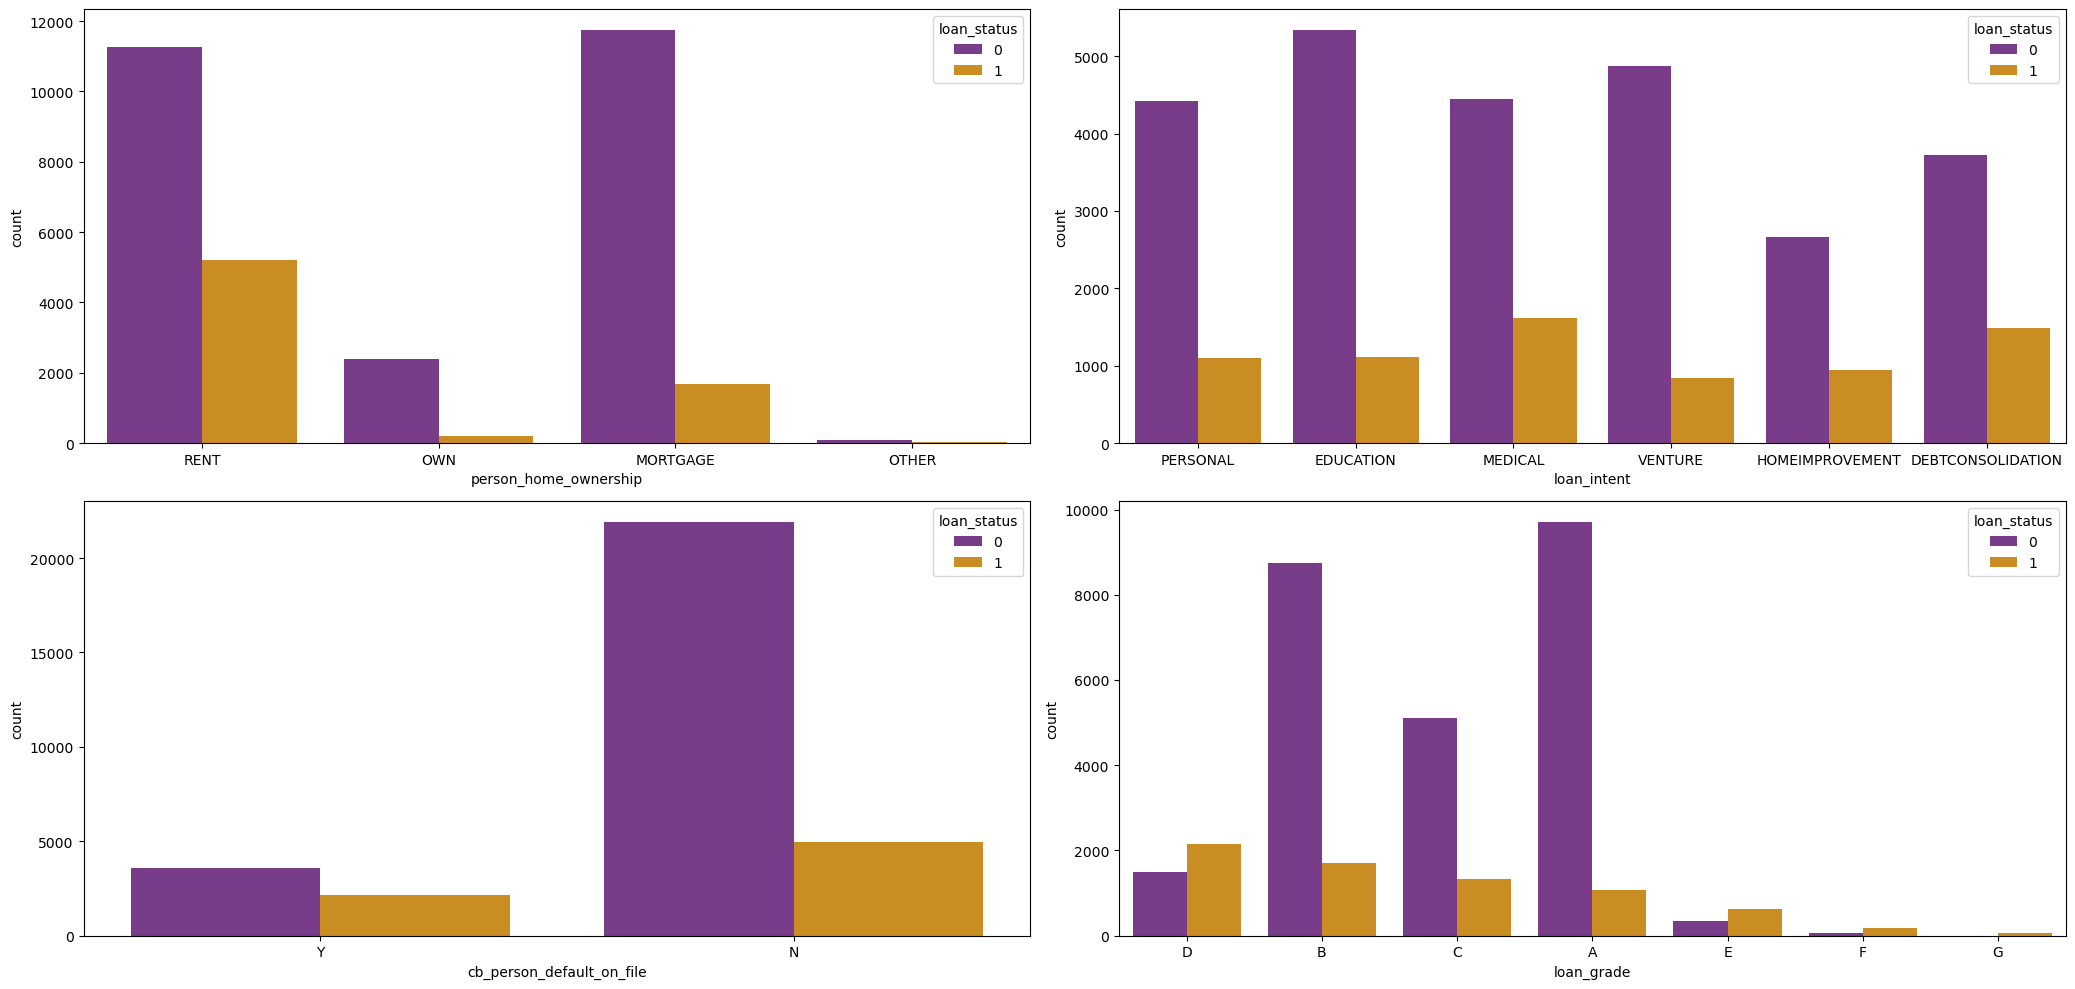

In [35]:
fig, axes = plt.subplots(2, 2, figsize=(21, 10))

sns.countplot(x='person_home_ownership', hue="loan_status", data=df, ax=axes[0, 0], palette='CMRmap')
sns.countplot(x='loan_intent', hue="loan_status", data=df, ax=axes[0, 1], palette='CMRmap')
sns.countplot(x='loan_grade', hue="loan_status", data=df, ax=axes[1, 1], palette='CMRmap')
sns.countplot(x='cb_person_default_on_file', hue="loan_status", data=df, ax=axes[1, 0], palette='CMRmap')

plt.tight_layout()  # Pour améliorer l'espacement entre les sous-graphiques

plt.show()
